In [1]:
%matplotlib inline


# GOES Flare and HEK Plot Example


An example showing how to combine GOES and HEK data


In [6]:
import matplotlib.pyplot as plt
from sunpy.lightcurve import GOESLightCurve
from sunpy.time import TimeRange, parse_time
from sunpy.net import hek
from sunpy.instr import goes

Let's first grab GOES XRS data for a particular time of interest


In [7]:
tr = TimeRange(['2011-06-07 04:00', '2011-06-07 12:00'])
goeslc = GOESLightCurve.create(tr)

/Users/dnryan/anaconda2/lib/python2.7/site-packages/sunpy/lightcurve/lightcurve.py:294: RuntimeWarning: Using existing file rather than downloading, use overwrite=True to override.
  warnings.warn("Using existing file rather than downloading, use overwrite=True to override.", RuntimeWarning)


Next lets grab the HEK data for this time from the NOAA Space Weather Prediction Center (SWPC)


In [8]:
client = hek.HEKClient()
flares_hek = client.query(hek.attrs.Time(tr.start,tr.end), hek.attrs.FL, hek.attrs.FRM.Name == 'SWPC')

Finally lets plot everything together


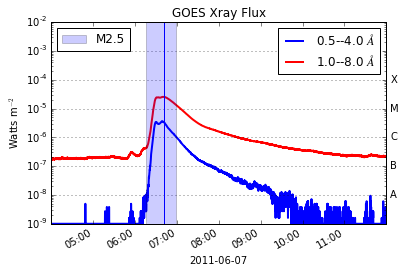

In [9]:
goeslc.peek()
plt.axvline(parse_time(flares_hek[0].get('event_peaktime')))
plt.axvspan(parse_time(flares_hek[0].get('event_starttime')), parse_time(flares_hek[0].get('event_endtime')),
            alpha=0.2, label=flares_hek[0].get('fl_goescls'))
plt.legend(loc=2)

Let's calculate the temperature and emission measure of the plasma.

In [14]:
goeslc = goes.calculate_temperature_em(goeslc)

In [20]:
goeslc.data[0:10]

,xrsa,xrsb,temperature,em
2011-06-07 04:00:01.321999,1.000000e-09,1.834600e-07,3.534262,2.055847e+48
2011-06-07 04:00:03.371999,1.000000e-09,1.808400e-07,3.550100,1.990333e+48
2011-06-07 04:00:05.418999,1.000000e-09,1.782200e-07,3.566302,1.925944e+48
2011-06-07 04:00:07.468999,1.000000e-09,1.808400e-07,3.550100,1.990333e+48
2011-06-07 04:00:09.514999,1.000000e-09,1.782200e-07,3.566302,1.925944e+48
2011-06-07 04:00:11.561999,1.000000e-09,1.808400e-07,3.550100,1.990333e+48
2011-06-07 04:00:13.608999,1.000000e-09,1.808400e-07,3.550100,1.990333e+48
2011-06-07 04:00:15.658999,1.000000e-09,1.808400e-07,3.550100,1.990333e+48
2011-06-07 04:00:17.704999,1.000000e-09,1.782200e-07,3.566302,1.925944e+48
2011-06-07 04:00:19.754999,1.000000e-09,1.755900e-07,3.582963,1.862406e+48


In [21]:
goeslc.data.index[0:10]

DatetimeIndex(['2011-06-07 04:00:01.321999', '2011-06-07 04:00:03.371999',
               '2011-06-07 04:00:05.418999', '2011-06-07 04:00:07.468999',
               '2011-06-07 04:00:09.514999', '2011-06-07 04:00:11.561999',
               '2011-06-07 04:00:13.608999', '2011-06-07 04:00:15.658999',
               '2011-06-07 04:00:17.704999', '2011-06-07 04:00:19.754999'],
              dtype='datetime64[ns]', freq=None)

In [25]:
goeslc.data.temperature[0:10]

2011-06-07 04:00:01.321999    3.534262
2011-06-07 04:00:03.371999    3.550100
2011-06-07 04:00:05.418999    3.566302
2011-06-07 04:00:07.468999    3.550100
2011-06-07 04:00:09.514999    3.566302
2011-06-07 04:00:11.561999    3.550100
2011-06-07 04:00:13.608999    3.550100
2011-06-07 04:00:15.658999    3.550100
2011-06-07 04:00:17.704999    3.566302
2011-06-07 04:00:19.754999    3.582963
Name: temperature, dtype: float64

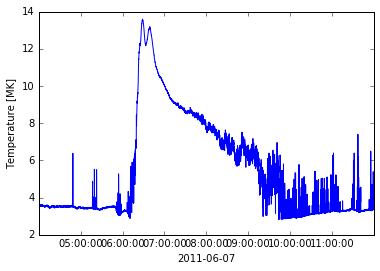

In [18]:
plt.plot(goeslc.data.index, goeslc.data.temperature)
plt.xlabel("{0}".format(goeslc.data.index[0].strftime("%Y-%m-%d")))
plt.ylabel("Temperature [MK]")

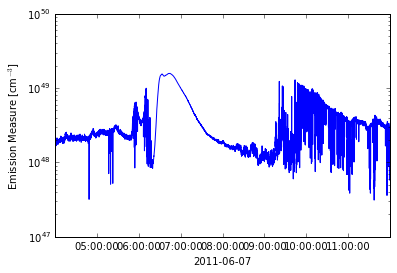

In [19]:
plt.plot(goeslc.data.index, goeslc.data.em)
plt.yscale("log")
plt.ylabel("Emission Measure [cm$^{-3}$]")
plt.xlabel("{0}".format(goeslc.data.index[0].strftime("%Y-%m-%d")))